In [143]:
from tensorflow.keras.layers import Input,ReLU,GRU,Bidirectional,Dense,LSTM
from tensorflow.keras import Model
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping,LearningRateScheduler,ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:
df.shape

(768, 9)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [57]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [58]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [59]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [60]:
print(len(df[df['Glucose']==0]))
print(len(df[df['BloodPressure']==0]))
print(len(df[df['SkinThickness']==0]))
print(len(df[df['Insulin']==0]))
print(len(df[df['BMI']==0]))

5
35
227
374
11


In [61]:
df['Glucose'] = df['Glucose'].replace(0 , df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0 , df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0 , df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0 , df['Insulin'].mean())
df['BMI'] =df['BMI'].replace(0 , df['BMI'].mean())

In [62]:
print(len(df[df['Glucose']==0]))
print(len(df[df['BloodPressure']==0]))
print(len(df[df['SkinThickness']==0]))
print(len(df[df['Insulin']==0]))
print(len(df[df['BMI']==0]))

0
0
0
0
0


In [63]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1


In [64]:
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106.0,76.0,20.536458,79.799479,37.5,0.197,26,0
759,6,190.0,92.0,20.536458,79.799479,35.5,0.278,66,1
760,2,88.0,58.0,26.000000,16.000000,28.4,0.766,22,0
761,9,170.0,74.0,31.000000,79.799479,44.0,0.403,43,1
762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33,0
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1
767,1,93.0,70.0,31.000000,79.799479,30.4,0.315,23,0


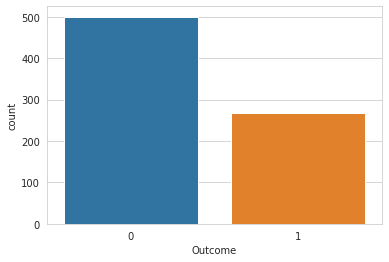

In [65]:
sns.countplot(x='Outcome' , data=df)

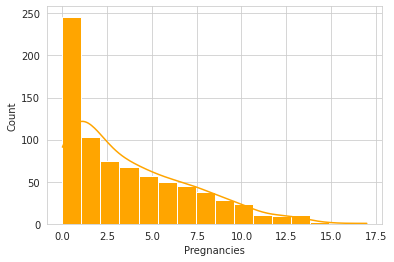

In [66]:
sns.histplot(x="Pregnancies",data = df,color="orange", alpha = 1.0,kde = True)
plt.show()

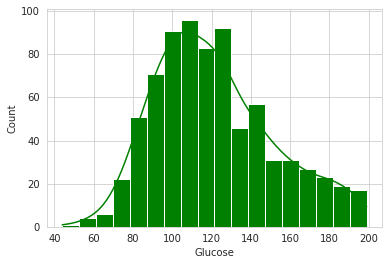

In [67]:
sns.histplot(x="Glucose",data = df,color="green", alpha = 1.0,kde = True)
plt.show()

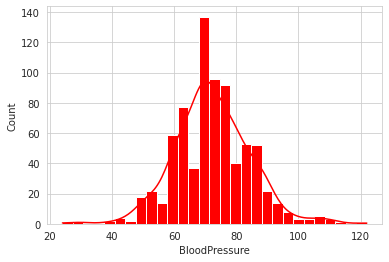

In [68]:
sns.histplot(x="BloodPressure",data = df,color="red", alpha = 1.0,kde = True)
plt.show()

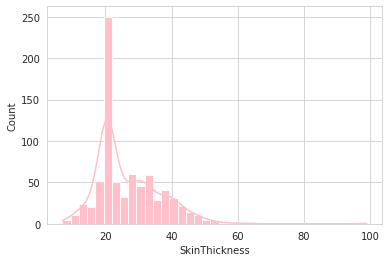

In [69]:
sns.histplot(x="SkinThickness",data = df,color="pink", alpha = 1.0,kde = True)
plt.show()

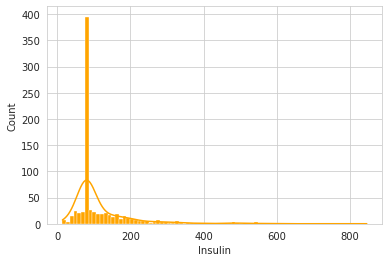

In [70]:
sns.histplot(x="Insulin",data = df,color="orange", alpha = 1.0,kde = True)
plt.show()

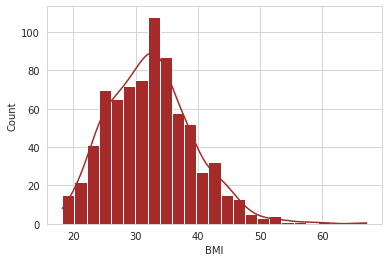

In [71]:
sns.histplot(x="BMI",data = df,color="brown", alpha = 1.0,kde = True)
plt.show()

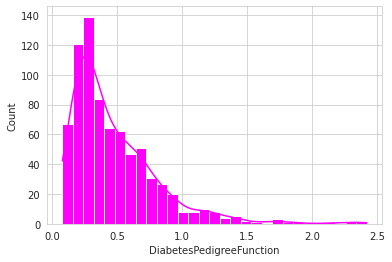

In [72]:
sns.histplot(x="DiabetesPedigreeFunction",data = df,color="fuchsia", alpha = 1.0,kde = True)
plt.show()

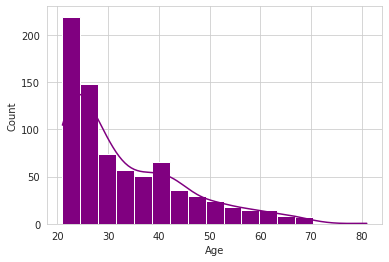

In [73]:
sns.histplot(x="Age",data = df,color="purple", alpha = 1.0,kde = True)
plt.show()

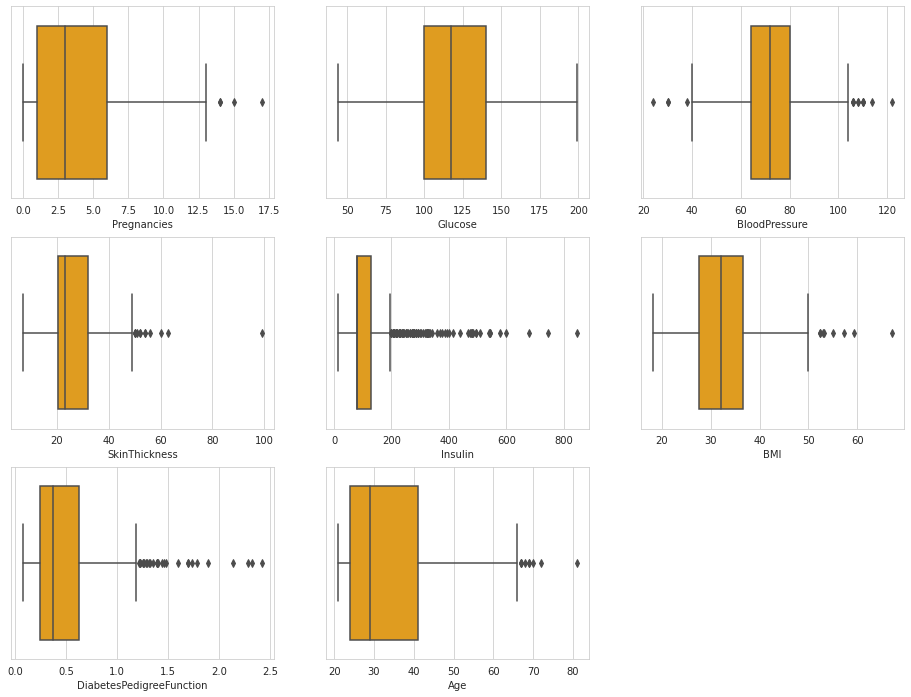

In [74]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Pregnancies',data=df,color="orange")
plt.subplot(3,3,2)
sns.boxplot(x='Glucose',data=df,color="orange")
plt.subplot(3,3,3)
sns.boxplot(x='BloodPressure',data=df,color="orange")
plt.subplot(3,3,4)
sns.boxplot(x='SkinThickness',data=df,color="orange")
plt.subplot(3,3,5)
sns.boxplot(x='Insulin',data=df,color="orange")
plt.subplot(3,3,6)
sns.boxplot(x='BMI',data=df,color="orange")
plt.subplot(3,3,7)
sns.boxplot(x='DiabetesPedigreeFunction',data=df,color="orange")
plt.subplot(3,3,8)
sns.boxplot(x='Age',data=df,color="orange")
plt.show()

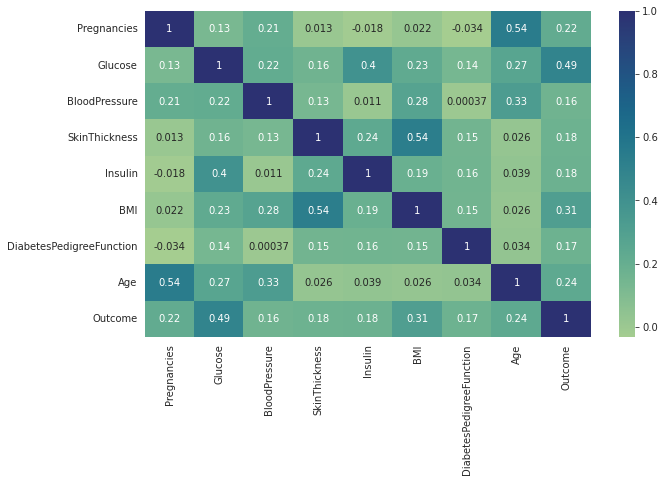

In [75]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="crest")
plt.show()

In [76]:
df_new = df.drop(['BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction'],axis='columns')
df_new.head()

,Pregnancies,Glucose,BMI,Age,Outcome
0,6,148.0,33.6,50,1
1,1,85.0,26.6,31,0
2,8,183.0,23.3,32,1
3,1,89.0,28.1,21,0
4,0,137.0,43.1,33,1


In [81]:
X = df_new.drop('Outcome',axis=1)
y = df_new['Outcome']

In [88]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer()
X_std = qt.fit_transform(X)

In [89]:
df_new_std = pd.DataFrame(X_std,columns=['Pregnancies',	'Glucose',	'BMI',	'Age'])
df_new_std.head()

,Pregnancies,Glucose,BMI,Age
0,0.747718,0.810300,0.591265,0.889831
1,0.232725,0.091265,0.213168,0.558670
2,0.863755,0.956975,0.077575,0.585398
3,0.232725,0.124511,0.284224,0.000000
4,0.000000,0.721643,0.926988,0.606258


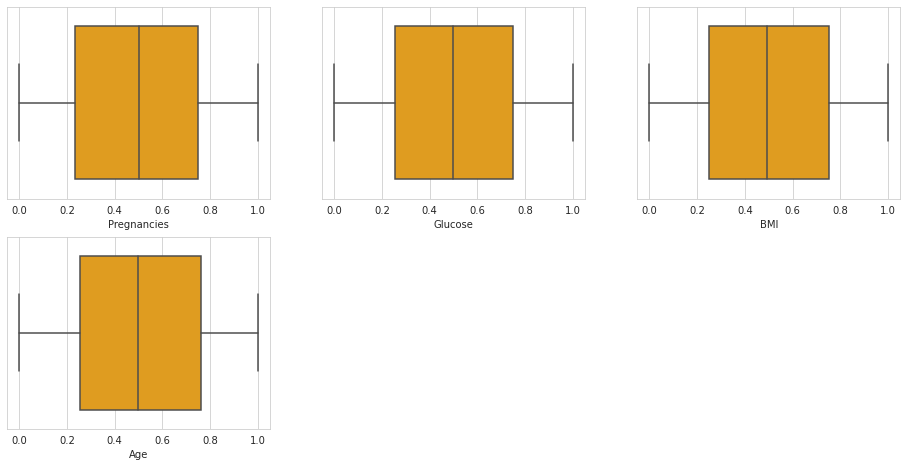

In [91]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Pregnancies',data=df_new_std,color="orange")
plt.subplot(3,3,2)
sns.boxplot(x='Glucose',data=df_new_std,color="orange")
plt.subplot(3,3,3)
sns.boxplot(x='BMI',data=df_new_std,color="orange")
plt.subplot(3,3,4)
sns.boxplot(x='Age',data=df_new_std,color="orange")
plt.show()

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_std, y, test_size=0.2, random_state=2)

In [93]:
print(X_train.shape,Y_train.shape, X_test.shape,Y_test.shape)

(614, 4) (614,) (154, 4) (154,)


In [95]:
# reshape input to be [samples, time steps, features]
# reshape((X_train_std.shape[0], 1, X_train_std.shape[1]))
X_train_reshaped = np.reshape(X_train ,(X_train.shape[0],1,X_train.shape[1]))
X_test_reshaped = np.reshape(X_test , (X_test.shape[0],1,X_test.shape[1]))

In [96]:
print(X_train_reshaped.shape)
print(X_test_reshaped.shape)

(614, 1, 4)
(154, 1, 4)


In [133]:
tf.random.set_seed(3)
inputs = Input(shape=(1,4)) # 1 ->row and 4->column
x = Bidirectional(GRU(units = 32, return_sequences=True))(inputs)  # returns a sequence of vectors of dimension 32
outputs = Dense(2, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs, name="bidirectional_LSTM")

In [136]:
# compiling the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# **Early Stopping**

In [144]:
early_etopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

In [146]:
def scheduler(epoch, lr):
  if epoch < 20:
     return lr
  else:
     return lr * tf.math.exp(-0.1)


# **Learning Rate Scheduler**

In [147]:
learning_rate_scheduler= LearningRateScheduler(scheduler, verbose=0)

# **Model Check Point**

In [148]:

filepath ='/content/drive/MyDrive/DiabetesPrediction/'
checkpoint  = ModelCheckpoint(filepath,
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

In [149]:
# training the Meural Network
history = model.fit(X_train_reshaped, Y_train, 
                    validation_split=0.1,
                    batch_size=3,
                    epochs=30,
                    callbacks=[early_etopping, learning_rate_scheduler,checkpoint])

Epoch 1/30
178/184 [============================>.] - ETA: 0s - loss: 0.4861 - accuracy: 0.7472
Epoch 1: val_loss improved from inf to 0.37690, saving model to /content/drive/MyDrive/DiabetesPrediction/


184/184 [==============================] - 17s 95ms/step - loss: 0.4879 - accuracy: 0.7446 - val_loss: 0.3769 - val_accuracy: 0.8226 - lr: 0.0010
Epoch 2/30
182/184 [============================>.] - ETA: 0s - loss: 0.4902 - accuracy: 0.7546
Epoch 2: val_loss did not improve from 0.37690
184/184 [==============================] - 1s 5ms/step - loss: 0.4863 - accuracy: 0.7572 - val_loss: 0.3872 - val_accuracy: 0.8387 - lr: 0.0010
Epoch 3/30
176/184 [===========================>..] - ETA: 0s - loss: 0.4863 - accuracy: 0.7538
Epoch 3: val_loss did not improve from 0.37690
184/184 [==============================] - 1s 5ms/step - loss: 0.4846 - accuracy: 0.7572 - val_loss: 0.3832 - val_accuracy: 0.8387 - lr: 0.0010
Epoch 4/30
178/184 [============================>.] - ETA: 0s - loss: 0.4796 - accuracy: 0.7584Restoring model weights from the end of the best epoch: 1.

Epoch 4: val_loss did not improve from 0.37690
184/184 [==============================] - 1s 5ms/step - loss: 0.4875 - accura

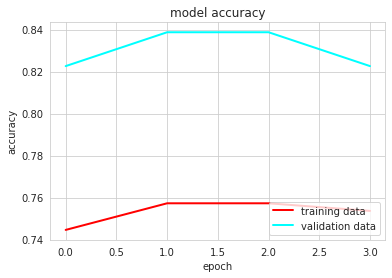

In [150]:
plt.plot(history.history['accuracy'],linewidth=2,color='red')
plt.plot(history.history['val_accuracy'],linewidth=2,color='cyan')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc = 'lower right')
plt.show()

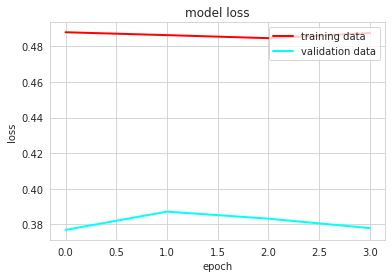

In [151]:
plt.plot(history.history['loss'],linewidth=2,color='red')
plt.plot(history.history['val_loss'],linewidth=2,color='cyan')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc = 'upper right')
plt.show()

In [152]:
y_predicted = model.predict(X_test_reshaped)
y_predicted

5/5 [==============================] - 1s 5ms/step


array([[[0.8180629 , 0.18049774]],

       [[0.6061363 , 0.39349613]],

       [[0.7104571 , 0.28084186]],

       [[0.4708922 , 0.496847  ]],

       [[0.3185956 , 0.6600624 ]],

       [[0.7196993 , 0.27722344]],

       [[0.8116608 , 0.18349655]],

       [[0.60288364, 0.4216798 ]],

       [[0.8076216 , 0.18414387]],

       [[0.43735135, 0.5651672 ]],

       [[0.5976119 , 0.38401207]],

       [[0.5351128 , 0.44377866]],

       [[0.53772134, 0.48070544]],

       [[0.69660395, 0.2932013 ]],

       [[0.7961541 , 0.18836464]],

       [[0.34902406, 0.6462689 ]],

       [[0.3591457 , 0.6494309 ]],

       [[0.8368061 , 0.15915193]],

       [[0.5643777 , 0.44357863]],

       [[0.25568214, 0.731719  ]],

       [[0.26478282, 0.72612995]],

       [[0.3824853 , 0.6058489 ]],

       [[0.68033683, 0.3146613 ]],

       [[0.4409103 , 0.5407492 ]],

       [[0.7576168 , 0.23448628]],

       [[0.681018  , 0.29518384]],

       [[0.2989039 , 0.6819001 ]],

       [[0.44887465, 0.54392

In [153]:
#By adding the axis argument, numpy looks at the rows and columns individually.
#axis=0 means that the operation is performed across the rows of log_preds. ---> but column wise
#axis=1 means that the operation is performed across the columns of log_preds. ---> but row wise
#axis=-1 means that the operation is performed points horizontally across the columns.
y_pred = np.argmax(y_predicted, axis=-1) #from log probabilities to 0 or 1
y_pred

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [154]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(Y_test,y_pred))
print ("Precision = ", metrics.precision_score(Y_test,y_pred,average='weighted'))
print ("Recall = ", metrics.recall_score(Y_test,y_pred,average='weighted'))
print ("F1 Score = ", metrics.f1_score(Y_test,y_pred,average='weighted'))

Accuracy =  0.7467532467532467
Precision =  0.7557317682317682
Recall =  0.7467532467532467
F1 Score =  0.7504452552636393


In [162]:
input_data = (2	,148.0,	33.6,	20)	
# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
input_data_reshaped.shape

(1, 4)

In [163]:
# standardizing the input data
input_data_QuantileTransformer = qt.transform(input_data_reshaped)
input_data_QuantileTransformer.shape

(1, 4)

In [164]:
# reshape input to be [samples, time steps, features]
input_data_reshaped_gru = input_data_QuantileTransformer.reshape(input_data_QuantileTransformer.shape[0],1,input_data_QuantileTransformer.shape[1])
input_data_reshaped_gru.shape


(1, 1, 4)

In [165]:
prediction = model.predict(input_data_reshaped_gru)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('No Diabetes')

else:
  print('Diabetes')

1/1 [==============================] - 0s 34ms/step
[[[0.5228754  0.49782506]]]
[0]
No Diabetes
